# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how="outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice_num = len(combined_df["Mouse ID"].unique())
mice_num

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
duplicate_mice_ID = combined_df.loc[duplicate_mice_ID, "Mouse ID"].unique()
duplicate_mice_ID


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ID = combined_df.loc[combined_df["Mouse ID"] == duplicate_mice_ID[0]]
duplicate_mice_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop(duplicate_mice_ID.index)
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice = cleaned_df["Mouse ID"].nunique()
cleaned_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).mean()
median = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).median()
variance = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).var()
standard_dev = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).std()
sem = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).sem()


# Assemble the resulting series into a single summary DataFrame.
stat_summary = pd.DataFrame({"Mean Tumor Volume": mean,
                        "Median Tumor Volume": median,
                        "Tumor Volume Variance": variance,
                        "Tumor Volume Standard Dev.": standard_dev,
                        "Tumor Volume Standard Error": sem})
stat_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Dev.,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

aggregated_summary = cleaned_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg({"mean", "median", "var", "std", "sem"})
aggregated_summary



Tumor Volume (mm3)                                           
                            sem       mean     median        var       std
Drug Regimen                                                              
Capomulin              0.329346  40.675741  41.557809  24.947764  4.994774
Ceftamin               0.469821  52.591172  51.776157  39.290177  6.268188
Infubinol              0.492236  52.884795  51.820584  43.128684  6.567243
Ketapril               0.603860  55.235638  53.698743  68.553577  8.279709
Naftisol               0.596466  54.331565  52.509285  66.173479  8.134708
Placebo                0.581331  54.033581  52.288934  61.168083  7.821003
Propriva               0.544332  52.320930  50.446266  43.852013  6.622085
Ramicane               0.320955  40.216745  40.673236  23.486704  4.846308
Stelasyn               0.573111  54.233149  52.431737  59.450562  7.710419
Zoniferol              0.516398  53.236507  51.818479  48.533355  6.966589

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

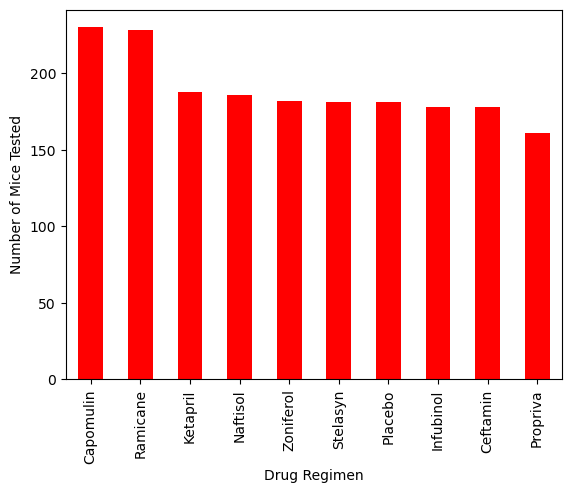

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_plot = combined_df["Drug Regimen"].value_counts().plot.bar(width=0.5, color="r")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")



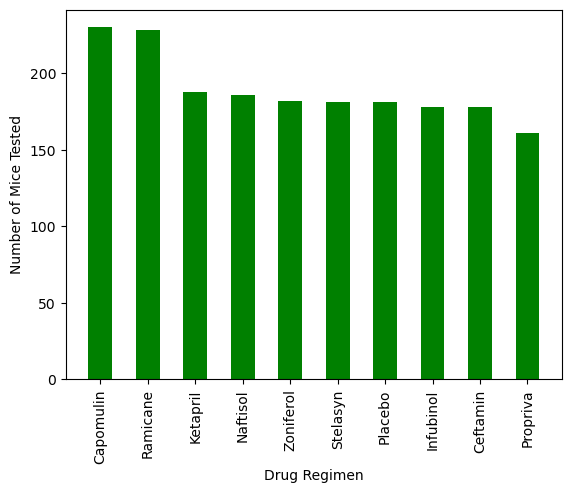

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#x_axis = np.arange(len(combined_df))
#y_axis = list(combined_df.index.values)

py_plot = combined_df["Drug Regimen"].value_counts()

x_axis = np.arange(len(py_plot))

plt.bar(x_axis, py_plot, width=0.5, color="green")

plt.xticks(x_axis, py_plot.index.values)

plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()




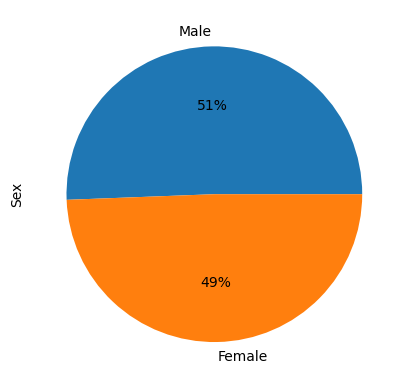

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie = combined_df["Sex"].value_counts()
pandas_pie.plot.pie(autopct= "%1.0f%%")
plt.show()



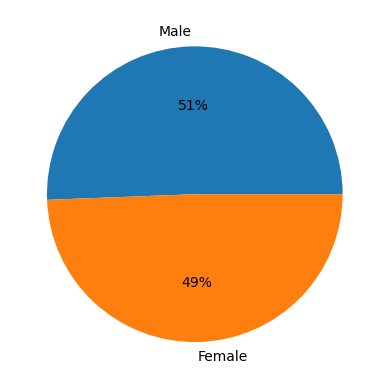

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_pie = combined_df["Sex"].value_counts()

plt.pie(pyplot_pie, labels=pyplot_pie.index.values, autopct="%1.0f%%")

plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
fin_tumor_vol = cleaned_df.groupby(["Drug Regimen", "Mouse ID"]).last()[["Timepoint", "Tumor Volume (mm3)"]]
fin_tumor_df = fin_tumor_vol.reset_index()       

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(combined_df, fin_tumor_df, on="Mouse ID")
merged_df.head()

,Mouse ID,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen_x,Sex,Age_months,Weight (g),Drug Regimen_y,Timepoint_y,Tumor Volume (mm3)_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,Capomulin,45,38.982878
1,b128,5,45.651331,0,Capomulin,Female,9,22,Capomulin,45,38.982878
2,b128,10,43.270852,0,Capomulin,Female,9,22,Capomulin,45,38.982878
3,b128,15,43.784893,0,Capomulin,Female,9,22,Capomulin,45,38.982878
4,b128,20,42.731552,0,Capomulin,Female,9,22,Capomulin,45,38.982878


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
regimen_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    fin_tumor_vol = fin_tumor_df.loc[fin_tumor_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    regimen_list.append(fin_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = fin_tumor_vol.quantile([0.25,0.5,0.75])
    lower_quart = quartiles[0.25]
    upper_quart = quartiles[0.75]
    mean = fin_tumor_vol.mean()
    iqr = upper_quart - lower_quart
    lower_bound = lower_quart - (1.5 * iqr)
    upper_bound = upper_quart - (1.5 * iqr)

    print(f"IQR for {drug}: {iqr}")
    print(f"Lower Bound for {drug} is {lower_bound}")
    print(f"Upper Bound for {drug} is {upper_bound}")
    
    
    # Find the outliers
    outliers = fin_tumor_vol.loc[(fin_tumor_vol < lower_bound)
                                 | (fin_tumor_vol > upper_bound)].count()
    
    print(f"{drug} Regimen outliers: {outliers}")


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin is 20.70456164999999
Upper Bound for Capomulin is 28.486425109999995
Capomulin Regimen outliers: 22
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane is 17.912664470000003
Upper Bound for Ramicane is 27.01120119
Ramicane Regimen outliers: 24
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol is 36.83290494999999
Upper Bound for Infubinol is 48.310040109999996
Infubinol Regimen outliers: 22
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin is 25.355449580000002
Upper Bound for Ceftamin is 40.93320176
Ceftamin Regimen outliers: 25


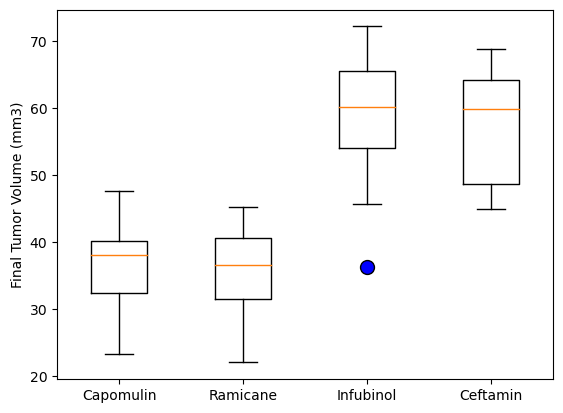

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.








flierprops = dict(marker="o", markerfacecolor="b", markersize=10)

plt.boxplot(regimen_list, flierprops=flierprops)

plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()





## Line and Scatter Plots

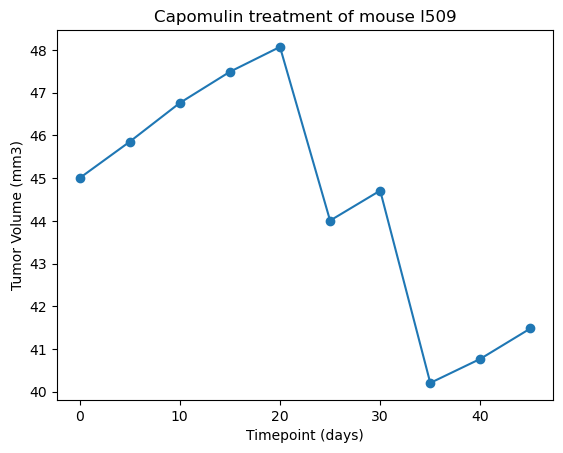

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capo = combined_df.loc[combined_df["Mouse ID"] == "l509"]

plt.plot(mouse_capo["Timepoint"], mouse_capo["Tumor Volume (mm3)"], marker = "o")

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


/var/folders/gx/3f_z0vjn37bd5y6ml4_x1nv40000gn/T/ipykernel_16535/1872238881.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capo_vol = capomulin_df.groupby(["Mouse ID"]).mean()


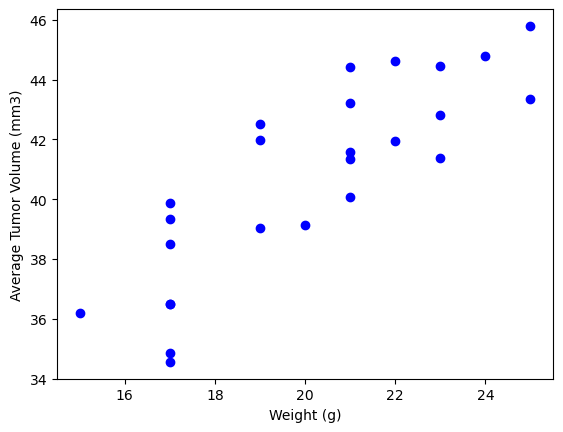

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]

fig1, axl = plt.subplots()
avg_capo_vol = capomulin_df.groupby(["Mouse ID"]).mean()
#avg_capo_tumor = capomulin_df.groupby["Tumor Volume (mm3)"]

markersize = 10
plt.scatter(avg_capo_vol["Weight (g)"], avg_capo_vol["Tumor Volume (mm3)"], color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()




## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


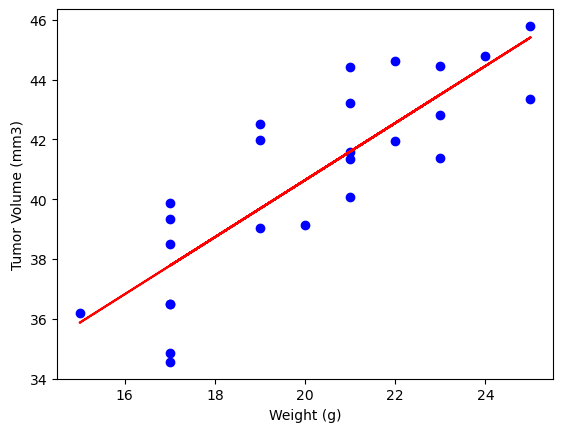

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capo_vol["Weight (g)"],avg_capo_vol["Tumor Volume (mm3)"])
# Print statement
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Calculate correlation coefficient and regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_capo_vol["Weight (g)"], avg_capo_vol["Tumor Volume (mm3)"])
reg_values = avg_capo_vol["Weight (g)"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

# Scatterplot
plt.scatter(avg_capo_vol["Weight (g)"], avg_capo_vol["Tumor Volume (mm3)"], color="blue")
plt.plot(avg_capo_vol["Weight (g)"], reg_values, color="red")
#plt.annotate("Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
